# Common Probability Distributions and Random Sampling

## The Uniform Distribution 

A very common distribution is the **uniform** distribution, which is defined by a constant probability density  over a range of values. The probability density function for a uniform distribution is given by
$$
U(x|a,b) = 
\begin{cases} 
\frac{1}{b-a} & \text{for } a \leq x < b, \\
0 & \text{otherwise}.
\end{cases}
$$

As we previously discussed in Week5, we can generate pseudo-random numbers from various distributions using the `np.random` module. 

Pseudo-random numbers require a **seed** to start the sequence of numbers. The seed is a number that is used to initialize the random number generator. If you use the same seed, you will get the same sequence of random numbers. If you don't specify a seed, the random number generator will use the current time as the seed, which means that the program you write will generate a different sequence of random numbers each time you run it, and hence any results (or bugs) will not be reproducible. I advise you to always specify a seed. 

In [1]:
# Instantiate the random number generator object with a seed 
import numpy as np
seed = 42
rng = np.random.default_rng(seed)
x1 = rng.uniform(low=0.0, high=1.0, size=(5,))
# see also rng.random(5) which generates 'standard' uniform deaviates between 0 and 1
print("x1:", *x1)
# if we call this generator again, we get 10 more unique values
x2 = rng.uniform(low=0.0, high=1.0, size=(5,))
print("x2:", *x2)

x1: 0.7739560485559633 0.4388784397520523 0.8585979199113825 0.6973680290593639 0.09417734788764953
x2: 0.9756223516367559 0.761139701990353 0.7860643052769538 0.12811363267554587 0.45038593789556713


In [2]:
# Reinitialize the generator with the same seed gives the same sequence
seed = 42
rng = np.random.default_rng(seed)
x_reinit = rng.uniform(low=0.0, high=1.0, size=(10,))
print("x_reinit:", *x_reinit)

x_reinit: 0.7739560485559633 0.4388784397520523 0.8585979199113825 0.6973680290593639 0.09417734788764953 0.9756223516367559 0.761139701990353 0.7860643052769538 0.12811363267554587 0.45038593789556713


In [3]:
# Reinitialize the generator with the same seed gives the same initial sequence
seed = 42
rng = np.random.default_rng(seed)
x1 = rng.uniform(low=0.0, high=1.0, size=(5,))
print("x1:", *x1)
# since we now generate Gaussian deviates in between, the sequence will be different
x_norm = rng.normal(loc=0.0, scale=1.0, size=(5,))
x2_after_gauss = rng.uniform(low=0.0, high=1.0, size=(5,))
print("x2:", *x2_after_gauss)

x1: 0.7739560485559633 0.4388784397520523 0.8585979199113825 0.6973680290593639 0.09417734788764953
x2: 0.37079802423258124 0.9267649888486018 0.6438651200806645 0.82276161327083 0.44341419882733113


The `scipy.stats` module is very useful for working with probability distributions, although I would not use it to generate random numbers because it does not have as sophisticated an interface for seeding the generators as `np.random`.

a_samp = 0.0000000534029949 ; b_samp = 1.0000000000000000


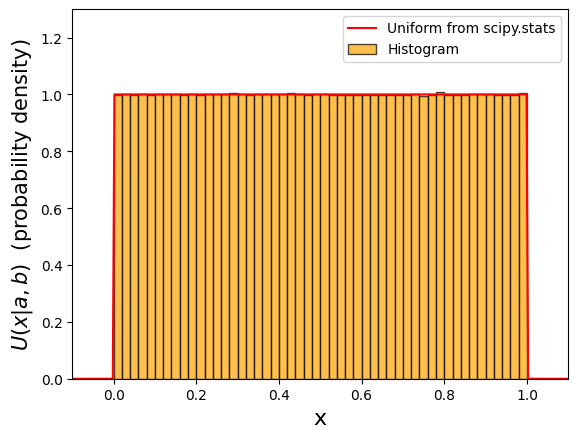

In [4]:
from scipy import stats
from matplotlib import pyplot as plt
a, b = 0, 1
# Generate random numbers from a uniform distribution
x = rng.uniform(low=a, high=b, size=(10000000,))

# Print out some stats from our samples 
a_samp, b_samp = np.min(x), np.max(x)
print(f'a_samp = {a_samp:.16f} ; b_samp = {b:.16f}')

# Compute the histogram
bins = np.linspace(-0.2, 1.2, 71)
counts, _ = np.histogram(x, bins=bins, density=True) 

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the uniform distribution function on a finer grid
x_fine = np.linspace(-2, 2, 1000)
uniform = stats.uniform.pdf(x_fine, loc=a, scale=b-a)
# Plot the uniform distribution function
plt.plot(x_fine, uniform, 'r-', label='Uniform from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$U(x|a, b)$' + '  (probability density)', fontsize=15)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.3)
plt.show()

## The Gaussian Distribution
By far the most common probability distribution is the **Gaussian** or **normal** distribution also sometimes referred to as the **bell curve**. The probability density function for a Gaussian distribution is given by
$$
\mathcal{N}(x| \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
$$
where $\mu$ is the mean of $x$, i.e. $\langle x\rangle$,  $\sigma^2$ is the variance of $x$. 


In [5]:
x_gauss = rng.normal(loc=0.0, scale=1.0, size=(10,))
# See also rng.randn which generates 'standard' normal deviates with mean 0 and standard deviation 1
print(x_gauss)

[ 0.51045872 -0.74685234 -0.47060216  0.97553655  1.00088937 -1.32292391
  1.27282394  1.05736405 -0.49918013  0.10134296]


mu = -0.000359838650 ; sigma = 0.999672202401


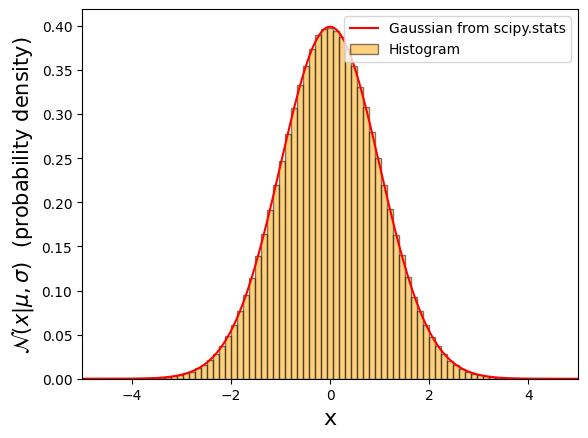

In [6]:
from scipy import stats
import numpy as np

x = rng.normal(loc=0.0, scale=1.0, size=(1000000,))

# Print out some stats from our samples 
mu, sigma = np.mean(x), np.std(x)
print(f'mu = {mu:.12f} ; sigma = {sigma:.12f}')

# Compute the histogram
bins = np.linspace(-6, 6, 100)
counts, _ = np.histogram(x, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.5, edgecolor='black', label='Histogram')

# Compute the Gaussian probability distribution function on a finer grid
x_fine = np.linspace(-6, 6, 1000)
gaussian = stats.norm.pdf(x_fine, loc=mu, scale=sigma)
# Plot the Gaussian probability distribution function
plt.plot(x_fine, gaussian, 'r-', label='Gaussian from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\mathcal{N}(x|\mu, \sigma)$' + '  (probability density)', fontsize=15)
plt.legend()
plt.xlim(-5, 5)
plt.show()

### Some Nice Properties of Gaussians

Gaussians have many nice properties that make them very useful in physics and statistics and very easy to manipulate. A few that we will use are: 

- If $x$ is Gaussian distributed with mean $\mu$ and variance $\sigma^2$, then $a x + b$ is also Gaussian distributed with mean $a\mu + b$ and variance $a^2\sigma^2$.

- If $x_1$ and $x_2$ are independent Gaussian random variables with means $\mu_1$ and $\mu_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, then the sum $x_1 + x_2$ is also a Gaussian random variable with mean $\mu_1 + \mu_2$ and variance $\sigma_1^2 + \sigma_2^2$.

- It thus follows that any linear combination of independent Gaussian random variables is also Gaussian with simple rules to 
compute the mean and variance of the resulting distribution.

We will not take the time to prove these properties here, but they are very useful in many applications. We will quickly demonstrate
using code. 

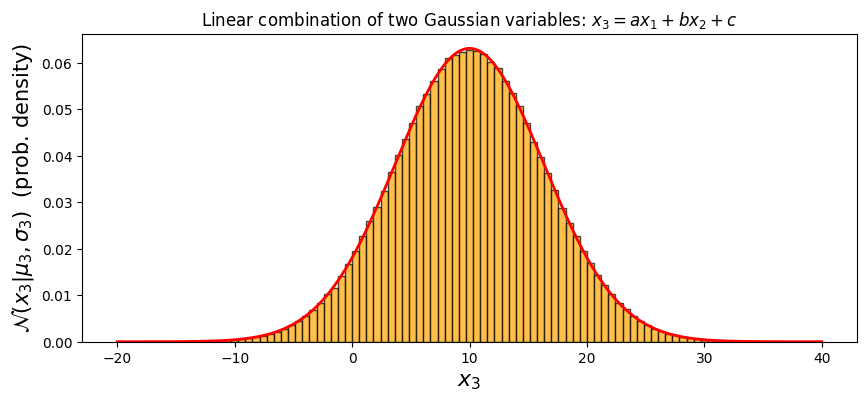

10 6.324555320336759


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the seed for reproducibility

# Generate Gaussian distributed random variables
mu1, sigma1 = 0, 1
mu2, sigma2 = 2, 2
x1 = rng.normal(mu1, sigma1, 1000000)
x2 = rng.normal(mu2, sigma2, 1000000)

# Create a linear combination of x1 and x2
a, b, c = 2, 3, 4
x3 = a * x1 + b * x2 + c
mu3 = a * mu1 + b * mu2 + c
sigma3 = np.sqrt(a**2*sigma1**2 + b**2*sigma2**2)

# Compute the histogram
bins = np.linspace(-20, 40, 100)
Pofx3, _ = np.histogram(x3, bins=bins, density=True)

# Plot the histogram and the Gaussian distribution function
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the histogram
ax.bar(bins[:-1], Pofx3, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the Gaussian distribution function on a finer grid
x_fine = np.linspace(-20, 40, 1000)
gaussian = norm.pdf(x_fine, loc=mu3, scale=sigma3)
ax.plot(x_fine, gaussian, 'r', linewidth=2)
ax.set_title(r"Linear combination of two Gaussian variables: $x_3 = a x_1 + b x_2 + c$")

# Add labels and legend
ax.set_xlabel(r'$x_3$', fontsize=16)
ax.set_ylabel(r'$\mathcal{N}(x_3|\mu_3, \sigma_3)$' + '  (prob. density)', fontsize=15)
plt.show()
print(mu3, sigma3)


## Counting Statistics and the Poisson Distribution 

In physics we often deal with situations where we are counting the number of randomly occuring events whose occurences are uncorrelated with each other. Some examples are: 
- The number of decays of a radioactive substance in a given time interval.
- The number of photons detected by a telescope in a given time interval.
- The number of galaxies measured in a random area of the sky. 
- The number of interactions recorded in some energy range, $E$ to $E + \Delta E$, between high energy particles and our particle detector. 
- The number of defects and dislocations in materials. 
  
The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in some fixed interval (of time, space, energy, wavelength, or any other variable) if these events occur with a known constant mean rate, and if the occurence of the events are independent of each other. Discrete here means that the number of events, $k$, can only take on integer values, $k = 0, 1, 2, 3, \cdots$, as is the nature of countable things.  The Poisson distribution is given by
$$
P(k|\mu) = \frac{\mu^k}{k!}\exp(-\mu),
$$
where $\mu$ is the mean number of events expected in the chosen interval (a real number) and $k$ is the discrete independent random variable (an integer) which is the number of events that actually occured in that interval. Here $k!\equiv k(k-1)(k-2)\cdots 1$ is the factorial of $k$.

For example, consider a call center which randomly receives an average of $\mu = 3.2$ calls per minute at all times of the day. If the calls are independent, receiving one does not change the probability of when the next one will arrive. Under these assumptions, the number $k$ of calls received during any minute will follow a Poisson probability distribution.   

We can generate some random draws from the Poisson distribution using `numpy` as shown below.

In [8]:
mu = 3.2
x = rng.poisson(lam=mu, size=(20,))
print('x =', *x)

x = 6 2 4 1 6 3 9 2 4 3 3 5 1 2 3 2 2 2 6 5


We can plot the Poisson distribution for this case as follows:

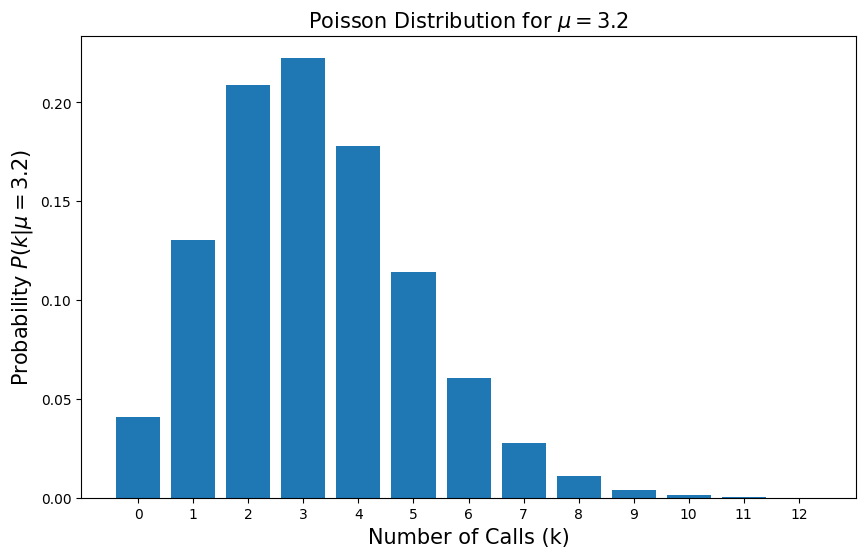

In [9]:
mu = 3.2  # average number of calls per minute

# Generate a range of k values
k_values = np.arange(0, 13)

# Calculate the Poisson probabilities for each k. Since it is a discrete distribution, 
# the P(k|mu) is given by the PMF = probability mass function 
# (as opposed to the PDF = probability density function)
probabilities = stats.poisson.pmf(k_values, mu)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution on the axes
ax.bar(k_values, probabilities)
ax.set_xlabel('Number of Calls (k)', fontsize=15)
ax.set_ylabel(r'Probability $P(k | \mu = {:.2})$'.format(mu), fontsize=15)
ax.set_title(r'Poisson Distribution for $\mu = {:.2}$'.format(mu), fontsize=15)

# Set xticks to match k_values
ax.set_xticks(k_values)
plt.show()


We can use `scipy.stats.poisson` to print out the probabilities for some relevant values of $k$, as well as compute some cumulative probabilities:
- the total probability of receiving $k=1$ to $k=4$ calls in a minute
- the total probability of receiving $k\leq 6$ calls in a minute, which is given by the cumulative distribution function, ${\rm CDF}(\leq 6)$
- the total probability of recieivng $k > 6$ calls in a minute, which is given by $1 - {\rm CDF}(\leq 6)$.

In [10]:
kvals = np.arange(0, 13)
prob_k = stats.poisson.pmf(kvals, mu)
print(f"k      P(k|mu)")
print(f"--------------")
for k, p in zip(kvals, prob_k):
    print(f"{k:2d}      {p:.5f}")
print(f"--------------")


# Probability of receiving between 1 to 4 calls 
prob_1_to_4 = stats.poisson.pmf(np.arange(1, 5), mu).sum()
print(f"Probability of k=1-4 calls = {np.sum(prob_1_to_4):.4f}")
# Probability of receiving <= 6 calls is given by the CDF(<= 6)
prob_le_6 = stats.poisson.cdf(6, mu)
print(f"Probability of k<=6  calls = {prob_le_6:.4f}")
# Probability of receiving > 6 calls is given by 1 - CDF
prob_gt_6 = 1 - prob_le_6 # Note this does not include 6
print(f"Probability of k>6   calls = {prob_gt_6:.4f}")

k      P(k|mu)
--------------
 0      0.04076
 1      0.13044
 2      0.20870
 3      0.22262
 4      0.17809
 5      0.11398
 6      0.06079
 7      0.02779
 8      0.01112
 9      0.00395
10      0.00126
11      0.00037
12      0.00010
--------------
Probability of k=1-4 calls = 0.7399
Probability of k<=6  calls = 0.9554
Probability of k>6   calls = 0.0446


Since the Poission distribution is a discrete probability distribution, it obeys the discrete version of the normalization condition, i.e.
$$
\sum_{k=0}^\infty P(k|\mu) = 1.
$$
We can easily prove that this condition is satisfied since
$$
\sum_{k=0}^\infty P(k|\mu) = \sum_{k=0}^\infty \frac{\mu^k}{k!}\exp(-\mu) = \exp(-\mu)\sum_{k=0}^\infty \frac{\mu^k}{k!} = \exp(-\mu)\left[1 + \frac{\mu}{1} + \frac{\mu^2}{2} + \frac{\mu^3}{3} + \cdots\right] = \exp(-\mu)\exp(\mu) = 1.
$$


The mean and variance of the Poisson distribution are both equal to $\mu$, i.e.
$$
\langle k\rangle = \mu; \quad \text{and} \quad {\rm Var}(k) = \mu, 
$$
so the standard deviation is $\sigma_k = \sqrt{\mu}$.

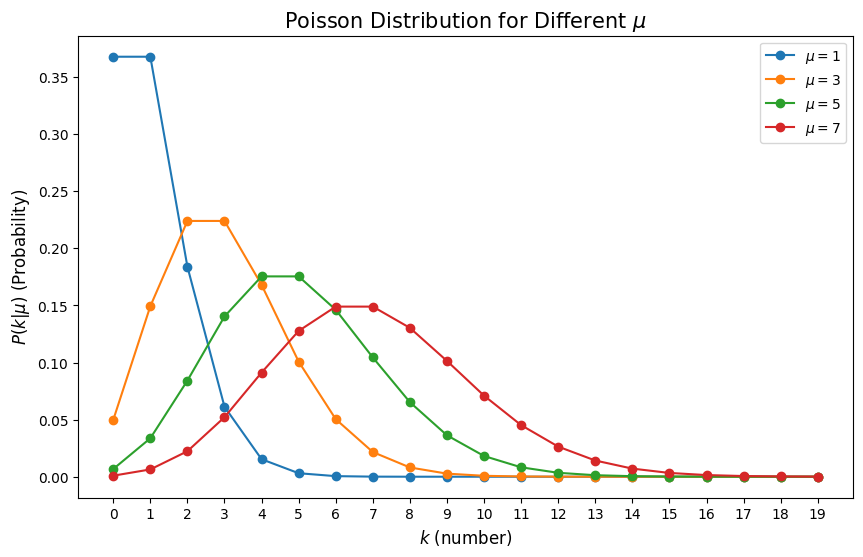

In [11]:
# Define a range of k values and mu values
k_values = np.arange(0, 20)
mu_values = [1, 3, 5, 7]

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution for each mu
for mu in mu_values:
    probabilities = stats.poisson.pmf(k_values, mu)
    ax.plot(k_values, probabilities, marker='o', linestyle='-', label=r'$\mu={:d}$'.format(mu))

# Set the labels and title
ax.set_xlabel(r'$k$ (number)', fontsize=12)
ax.set_ylabel(r'$P(k|\mu)$ (Probability)', fontsize=12)
ax.set_title(r'Poisson Distribution for Different $\mu$', fontsize=15)

# Add a legend
ax.legend()

# Set xticks to match k_values
ax.set_xticks(k_values)

plt.show()

In the limit where $\mu$ is large the Poisson distribution approaches a Gaussian distribution with the same mean and variance, i.e.
$$
P(k|\mu) \approx \mathcal{N}(k|\mu, \sqrt{\mu}), \quad \text{for} \quad \mu \gg 1.
$$


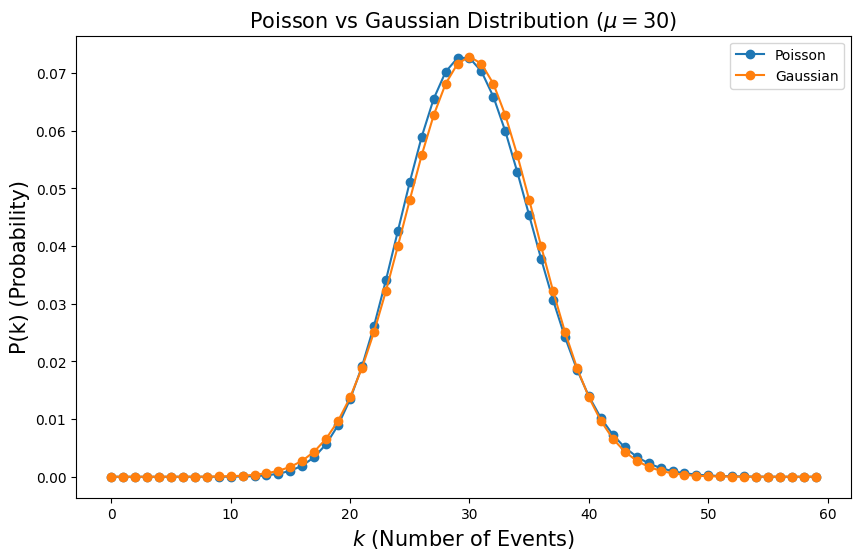

In [12]:
mu = 30  # mean rate
sigma = np.sqrt(mu)  # standard deviation for Gaussian

# Define a range of k values
k_values = np.arange(0,60)

# Calculate the Poisson probabilities
poisson_probabilities = stats.poisson.pmf(k_values, mu)

# Calculate the Gaussian probabilities
gaussian_probabilities = stats.norm.pdf(k_values, mu, sigma)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution
ax.plot(k_values, poisson_probabilities, marker='o', linestyle='-', label='Poisson')

# Plot the Gaussian distribution
ax.plot(k_values, gaussian_probabilities, marker='o', linestyle='-', label='Gaussian')

# Set the labels and title
ax.set_xlabel('$k$ (Number of Events)', fontsize=15)
ax.set_ylabel('P(k) (Probability)', fontsize=15)
ax.set_title(r'Poisson vs Gaussian Distribution ($\mu = 30$)', fontsize=15)

# Add a legend
ax.legend()



plt.show()

### Example: Counting Photons in Astronomy

In astronomy we use telescopes with large apertures (the area of the lens or mirror) to collect photons (light) from astronomical sources. The arrival of these
photons obeys Poisson statistics. Let $N$ be the mean number of photons detected in some time interval, which you can identify with the exposure time, $t$,  of the digital 
camera on the instrument attached to our telescope. The Poisson distribution for the number of photons detected in this time interval is then
$$
P(k| N) = \frac{N^k}{k!}\exp(-N), 
$$
where $k$ is the number of photons actually detected in the interval. From above, we know that 
$$
\sigma_k = \sqrt{N},
$$
which is the well-known $\sqrt{N}$ rule for the standard deviation of photon-counting statistics. 

We often speak of the signal-to-noise ratio
$$
{\left(\rm \frac{S}{N}\right)} \equiv  {\rm \frac{Signal}{Noise}} = \frac{N}{\sqrt{N}} = \sqrt{N}. 
$$

Most astronomical sources do not vary in brightness on the short timescales of our digital camera exposures, such that it is a very good approximation to assume that the average rate
at which photons are being emitted, $R$ (units: photons/second), is equal to a constant over the time interval $t$, hence
$$
N = R t,
$$
so we can finally write
$$
{\left(\rm \frac{S}{N}\right)} = \sqrt{R t} \propto \sqrt{t}.
$$
We have just derived that the signal-to-noise ratio of an astronomical obesrvation improves only as the square root of the exposure time in the limit where photon counting from the object is the dominant source of noise. 